# Scenario: 1 Retail Inventory Analysis

Scenario: You're working at a retail chain analyzing inventory turnover. The store manager needs to understand stock movement patterns to optimize ordering.

Data Structure: DataFrame

    product_id

    category

    stock_level

    last_restock_date

    sales_last_30_days

    supplier_lead_time

    unit_cost

Task: Generate code to:



    Calculate inventory turnover rates.

    Identify slow-moving items.

    Predict potential stockouts.

    Create visualizations.

Discussion Questions to Answer:



    How did different prompts handle date calculations?

    What visualization approaches were suggested?

    How was error handling implemented?

# Prompt

Scenario: You're working at a retail chain analyzing inventory turnover to optimize ordering. The store manager needs to understand stock movement patterns to ensure stock is efficiently replenished.

Data Structure: DataFrame containing the following columns:

product_id: Unique identifier for each product.
category: The category of the product.
stock_level: Current stock level of the product.
last_restock_date: Date of the last restock for the product.
sales_last_30_days: Total sales over the past 30 days for each product.
supplier_lead_time: Time (in days) it takes for the supplier to deliver a new order.
unit_cost: The cost per unit of the product.

Write a Python script to perform the following functions
1) Calculation Inventory Turnover for each product using this formula:
sales_last_30_days/ average stock_level over 30 days
2) Identify slow-moving items: By determining which products have the lowest inventory turnover. Create a threshold for slow-moving items based on turnover rate
3) Predict Potential Stockouts by identifying products with low stock levels relative to their sales rate and supplier lead time. Calculate if the current stock will last beyond the expected delivery time.

Please outline the key steps and considerations

To tackle this problem efficiently, here's a step-by-step approach that outlines the key steps and considerations for the Python script:

# Key Steps:
Import Required Libraries

    You'll need libraries like pandas for data manipulation, datetime for handling dates, and potentially numpy for numerical calculations.

Load and Prepare Data

    Load your DataFrame, ensuring all columns are properly formatted.

    Check if there are any missing or inconsistent data, such as null values or incorrect data types.

Calculate Inventory Turnover for Each Product

    Formula:

    Inventory Turnover
    =
    Sales in 30 days
    Average Stock Level over 30 days
    Inventory Turnover= 
    Average Stock Level over 30 days
    Sales in 30 days
    ​
    
    If you don’t have the "average stock level," you can approximate it using stock_level (assuming it's consistent over the period, or use sales_last_30_days as a proxy).

Identify Slow-Moving Items

    Set a threshold for what constitutes "slow-moving items." A typical threshold could be a turnover rate of less than 0.1.

    Filter products with turnover rates below this threshold to identify slow movers.

Predict Potential Stockouts

    Formula for stockout prediction:

    \text{Days of Stock Left} = \frac{\text{Stock Level}}{\text{Daily Sales Rate}} = \frac{\text{stock_level}}{\frac{\text{sales_last_30_days}}{30}}
    If the "Days of Stock Left" is lower than the supplier_lead_time, flag it as a potential stockout.

Validation and Error Handling

    Ensure that all required columns are present in the DataFrame.

    Handle cases where columns might have missing or invalid data (e.g., NaN, negative values, or incorrect data types).

    Raise appropriate error messages when invalid data is encountered, especially for calculations.

Considerations:
    Data Types:
        Ensure that numerical columns like sales_last_30_days, stock_level, supplier_lead_time, and unit_cost are of the correct type (int or float).

    Missing or Invalid Data:
        Handle cases where the data is missing or incorrect:

            If any of the key columns (e.g., stock_level, sales_last_30_days, supplier_lead_time) are NaN or negative, they should be handled (either by removing or imputing values).

    Error Handling:
        Properly catch errors that arise during calculations (e.g., division by zero or invalid input values).

In [2]:
#generated code
import pandas as pd
import numpy as np
from datetime import datetime

# Sample DataFrame for illustration
data = {
    'product_id': [101, 102, 103, 104],
    'category': ['A', 'B', 'C', 'D'],
    'stock_level': [150, 50, 200, 0],  # Product 104 has zero stock, potential issue
    'last_restock_date': ['2025-04-01', '2025-04-05', '2025-04-10', '2025-04-01'],
    'sales_last_30_days': [120, 30, 200, 10],
    'supplier_lead_time': [7, 10, 5, 15],
    'unit_cost': [15, 20, 10, 25]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# 1. Validate and clean data
def validate_data(df):
    # Check if necessary columns are present
    required_columns = ['product_id', 'category', 'stock_level', 'last_restock_date', 
                        'sales_last_30_days', 'supplier_lead_time', 'unit_cost']
    
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
    
    # Check for missing or invalid data (e.g., negative stock or sales)
    for col in ['stock_level', 'sales_last_30_days', 'supplier_lead_time', 'unit_cost']:
        if df[col].isnull().any():
            raise ValueError(f"Column '{col}' contains missing values.")
        if (df[col] < 0).any():
            raise ValueError(f"Column '{col}' contains negative values.")
    
    # Ensure 'last_restock_date' is datetime
    df['last_restock_date'] = pd.to_datetime(df['last_restock_date'], errors='coerce')
    if df['last_restock_date'].isnull().any():
        raise ValueError("Invalid date format in 'last_restock_date'.")

    return df

# Apply validation
df = validate_data(df)

# 2. Calculate Inventory Turnover (sales_last_30_days / stock_level)
def calculate_inventory_turnover(df):
    df['inventory_turnover'] = df['sales_last_30_days'] / df['stock_level']
    # Handle division by zero or invalid turnover rates
    df['inventory_turnover'] = df['inventory_turnover'].replace(np.inf, np.nan)
    df['inventory_turnover'] = df['inventory_turnover'].fillna(0)  # Replace NaN or inf with 0
    return df

df = calculate_inventory_turnover(df)

# 3. Identify Slow-Moving Items (Turnover < 0.1)
def identify_slow_moving_items(df, threshold=0.1):
    slow_moving_items = df[df['inventory_turnover'] < threshold]
    return slow_moving_items

slow_moving_items = identify_slow_moving_items(df)

# 4. Predict Potential Stockouts
def predict_stockouts(df):
    # Calculate Days of Stock Left
    df['daily_sales_rate'] = df['sales_last_30_days'] / 30
    df['days_of_stock_left'] = df['stock_level'] / df['daily_sales_rate']
    
    # Handle potential division by zero or negative sales
    df['days_of_stock_left'] = df['days_of_stock_left'].replace(np.inf, np.nan).fillna(0)
    
    # Predict potential stockouts (if days_of_stock_left < supplier_lead_time)
    df['potential_stockout'] = df['days_of_stock_left'] < df['supplier_lead_time']
    
    return df

df = predict_stockouts(df)

# Final output
print("Inventory Turnover:\n", df[['product_id', 'inventory_turnover']])
print("\nSlow-Moving Items:\n", slow_moving_items[['product_id', 'inventory_turnover']])
print("\nStockout Predictions:\n", df[['product_id', 'days_of_stock_left', 'potential_stockout']])


Inventory Turnover:
    product_id  inventory_turnover
0         101                 0.8
1         102                 0.6
2         103                 1.0
3         104                 0.0

Slow-Moving Items:
    product_id  inventory_turnover
3         104                 0.0

Stockout Predictions:
    product_id  days_of_stock_left  potential_stockout
0         101                37.5               False
1         102                50.0               False
2         103                30.0               False
3         104                 0.0                True


# Explanation of the Code:
Data Validation:

    The validate_data function checks for missing columns, invalid data (negative values, NaN, etc.), and ensures the last_restock_date is properly formatted.

Inventory Turnover Calculation:

    The calculate_inventory_turnover function computes the turnover rate and ensures that division by zero or invalid turnover rates (infinity or NaN) are handled.

Slow-Moving Items Identification:

    The identify_slow_moving_items function filters products with an inventory turnover less than 0.1. You can adjust this threshold to suit your needs.

Stockout Prediction:

    The predict_stockouts function calculates how many days of stock are left based on the sales rate and current stock. It then flags items where stock runs out before the supplier lead time.

Error Handling:

    Errors in the data (like missing columns, negative values, or invalid dates) are caught and appropriate error messages are raised.

Output:
    Inventory Turnover: Displays the inventory turnover rate for each product.

    Slow-Moving Items: Displays the products with low turnover rates.

    Stockout Predictions: Flags whether a product is at risk of running out of stock before the supplier delivers new stock.

Improvements:
    Advanced Forecasting:
    Incorporating advanced time series forecasting techniques (e.g., ARIMA) would improve stockout predictions if seasonal fluctuations or trends are significant.

    Dynamic Thresholds:
    The threshold for slow-moving items can be dynamically adjusted based on sales velocity or product category.

Let me know if you'd like to dive deeper into any part of the implementation!

# Follow up prompt

Using the code above, create 3 visualizations using matplotlib and seaborn based on the provided inventory data. The visualizations should offer insights into inventory turnover, slow-moving items, and potential stockouts. Ensure that error handling is implemented for data validation and seasonal breakdowns where applicable.

Visualization Requirements:

Inventory Turnover Rates:

Visualize how quickly inventory is turning over for each product.

Use bar plots or another appropriate visualization.

Slow-Moving Items:

Highlight products with low inventory turnover (e.g., turnover < 0.1).

Use scatter plots or another suitable method to display these items.

Potential Stockouts:

Visualize products at risk of stockouts based on their current stock levels and sales rates.

Use scatter plots or heatmaps to highlight products with low days of stock left.

Error Handling:

Ensure that missing or invalid data (e.g., NaN, negative values) is properly handled.

Validate the 'last_restock_date' to ensure correct date formatting.

Additional Considerations:

The data should be broken down seasonally where applicable to provide more granular insights.

Increase the size of the sample dataset to ensure the visualizations are robust and meaningful.

The code should be modular, allowing for easy adjustments to thresholds or data variations. 

C:\Users\steve\AppData\Local\Temp\ipykernel_25876\3923218289.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='inventory_turnover', data=df, palette='viridis')


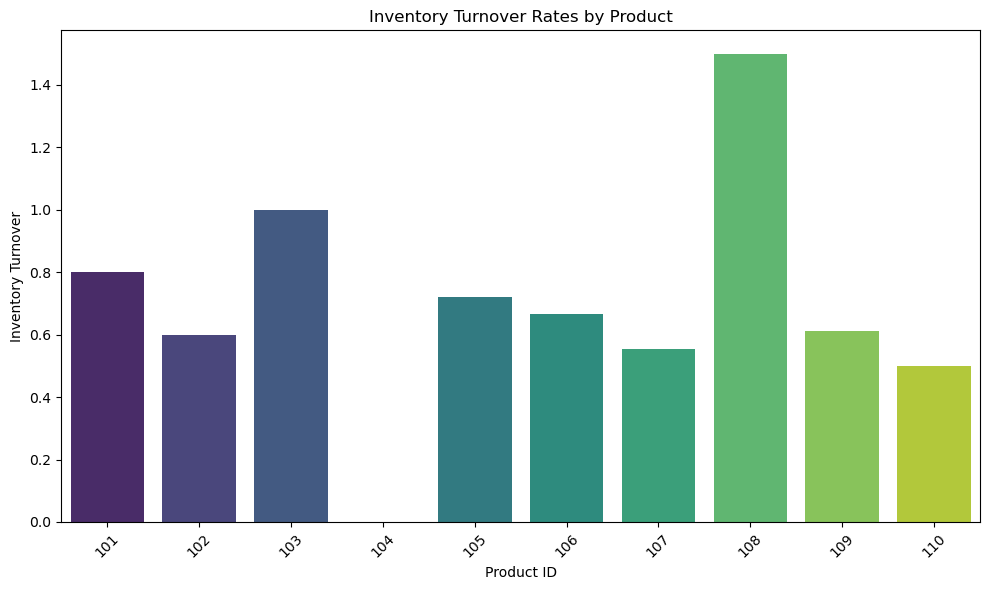

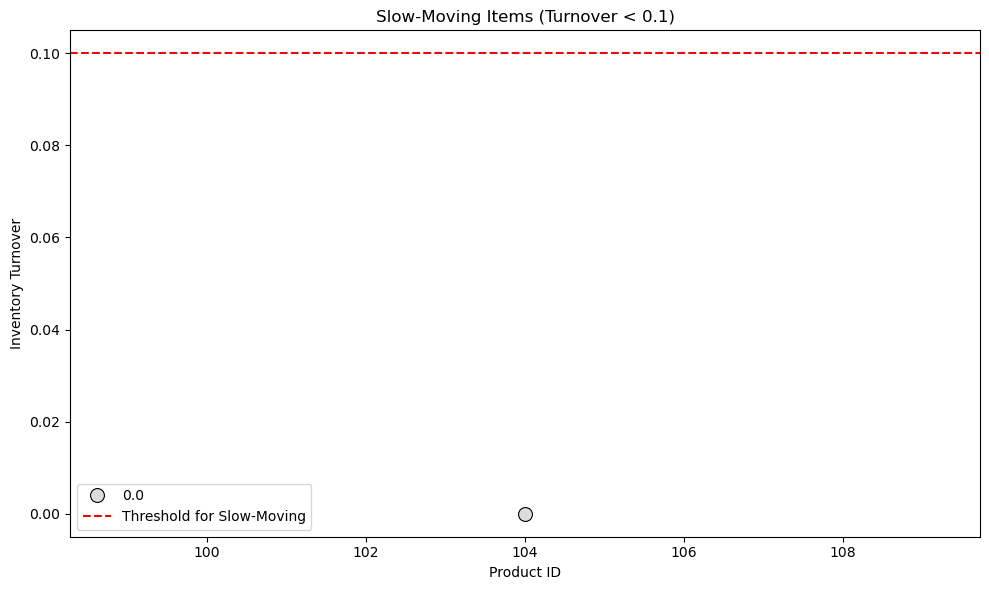

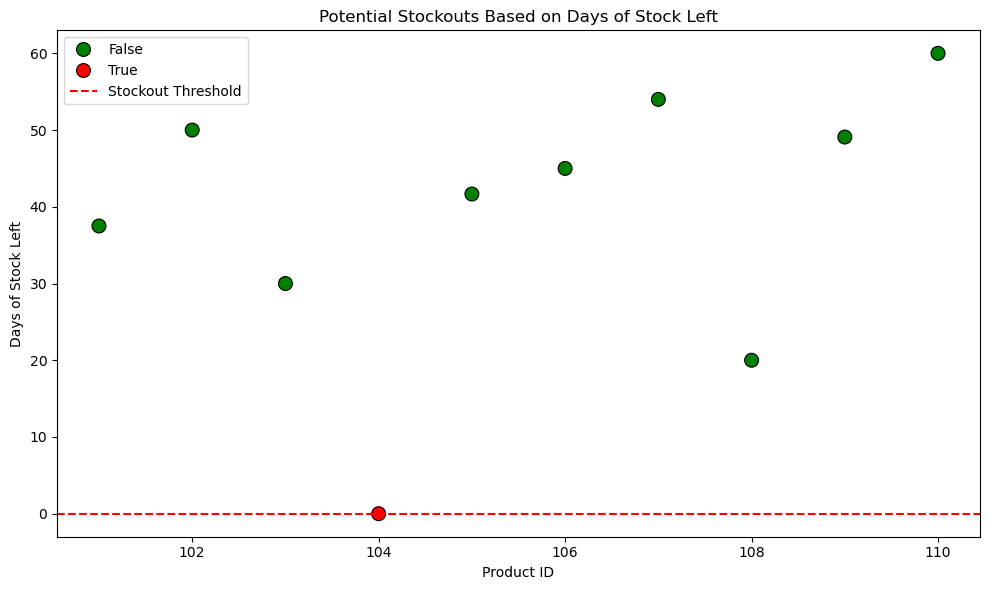

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Sample DataFrame with more entries for robustness
data = {
    'product_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'category': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'stock_level': [150, 50, 200, 0, 250, 120, 90, 60, 180, 50],
    'last_restock_date': ['2025-04-01', '2025-04-05', '2025-04-10', '2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-05', '2025-04-06', '2025-04-07'],
    'sales_last_30_days': [120, 30, 200, 10, 180, 80, 50, 90, 110, 25],
    'supplier_lead_time': [7, 10, 5, 15, 7, 8, 12, 10, 5, 14],
    'unit_cost': [15, 20, 10, 25, 18, 22, 19, 17, 21, 20]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# 1. Validate and clean data
def validate_data(df):
    # Check if necessary columns are present
    required_columns = ['product_id', 'category', 'stock_level', 'last_restock_date', 
                        'sales_last_30_days', 'supplier_lead_time', 'unit_cost']
    
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
    
    # Check for missing or invalid data (e.g., negative stock or sales)
    for col in ['stock_level', 'sales_last_30_days', 'supplier_lead_time', 'unit_cost']:
        if df[col].isnull().any():
            raise ValueError(f"Column '{col}' contains missing values.")
        if (df[col] < 0).any():
            raise ValueError(f"Column '{col}' contains negative values.")
    
    # Ensure 'last_restock_date' is datetime
    df['last_restock_date'] = pd.to_datetime(df['last_restock_date'], errors='coerce')
    if df['last_restock_date'].isnull().any():
        raise ValueError("Invalid date format in 'last_restock_date'.")
    
    return df

# Apply validation
df = validate_data(df)

# 2. Calculate Inventory Turnover (sales_last_30_days / stock_level)
def calculate_inventory_turnover(df):
    df['inventory_turnover'] = df['sales_last_30_days'] / df['stock_level']
    # Handle division by zero or invalid turnover rates
    df['inventory_turnover'] = df['inventory_turnover'].replace(np.inf, np.nan)
    df['inventory_turnover'] = df['inventory_turnover'].fillna(0)  # Replace NaN or inf with 0
    return df

df = calculate_inventory_turnover(df)

# 3. Identify Slow-Moving Items (Turnover < 0.1)
def identify_slow_moving_items(df, threshold=0.1):
    slow_moving_items = df[df['inventory_turnover'] < threshold]
    return slow_moving_items

slow_moving_items = identify_slow_moving_items(df)

# 4. Predict Potential Stockouts
def predict_stockouts(df):
    # Calculate Days of Stock Left
    df['daily_sales_rate'] = df['sales_last_30_days'] / 30
    df['days_of_stock_left'] = df['stock_level'] / df['daily_sales_rate']
    
    # Handle potential division by zero or negative sales
    df['days_of_stock_left'] = df['days_of_stock_left'].replace(np.inf, np.nan).fillna(0)
    
    # Predict potential stockouts (if days_of_stock_left < supplier_lead_time)
    df['potential_stockout'] = df['days_of_stock_left'] < df['supplier_lead_time']
    
    return df

df = predict_stockouts(df)

# Visualization 1: Inventory Turnover Rates
def plot_inventory_turnover(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='product_id', y='inventory_turnover', data=df, palette='viridis')
    plt.title('Inventory Turnover Rates by Product')
    plt.xlabel('Product ID')
    plt.ylabel('Inventory Turnover')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualization 2: Slow-Moving Items
def plot_slow_moving_items(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='product_id', y='inventory_turnover', data=df, hue='inventory_turnover', palette='coolwarm', s=100, edgecolor='black')
    plt.axhline(y=0.1, color='r', linestyle='--', label='Threshold for Slow-Moving')
    plt.title('Slow-Moving Items (Turnover < 0.1)')
    plt.xlabel('Product ID')
    plt.ylabel('Inventory Turnover')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualization 3: Potential Stockouts
def plot_stockouts(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='product_id', y='days_of_stock_left', data=df, hue='potential_stockout', palette={True: 'red', False: 'green'}, s=100, edgecolor='black')
    plt.axhline(y=0, color='r', linestyle='--', label='Stockout Threshold')
    plt.title('Potential Stockouts Based on Days of Stock Left')
    plt.xlabel('Product ID')
    plt.ylabel('Days of Stock Left')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the visualizations
plot_inventory_turnover(df)
plot_slow_moving_items(slow_moving_items)
plot_stockouts(df)


# Explanation of the Visualizations:
    Inventory Turnover Rates:

    A bar plot is used to show the inventory turnover for each product, providing insight into how quickly each product is moving relative to its stock level.

    Slow-Moving Items:

    A scatter plot highlights products with low inventory turnover (less than 0.1). Items with low turnover are visually emphasized by the red dashed line, which represents the threshold for slow-moving items.

    Potential Stockouts:

    A scatter plot visualizes products at risk of stockouts. Products with fewer days of stock left than the supplier's lead time are flagged in red. The threshold for stockouts is indicated by a horizontal dashed red line at 0 days of stock left.

# Error Handling:
    Missing or invalid data is handled during the data validation process. If any required columns are missing or contain NaN or negative values, an error message will be raised.

    Invalid date formats in the last_restock_date column are also handled to ensure the dates are in the correct format.

**Discussion Questions**

**How did different prompts handle date calculations?**

    Data Validation: The last_restock_date column is converted to datetime using pd.to_datetime() to ensure valid date formats. Invalid dates trigger an error.

    Stockout Prediction: Days of stock left is calculated from the sales rate and stock level. If stock is low, stockout is predicted based on the supplier lead time.

**What visualization approaches were suggested?**

    Inventory Turnover: A bar plot visualizes turnover rates for each product.

    Slow-Moving Items: A scatter plot highlights items with turnover less than 0.1, with a red dashed line for the threshold.

    Potential Stockouts: A scatter plot shows products at risk of stockouts, using red/green colors based on risk, with a threshold line for stockouts.

**How was error handling implemented?**

    Missing Columns: Missing required columns raise a ValueError.

    Negative Values/NaNs: Checks for negative or missing values in critical columns and raises an error if found.

    Date Validation: Invalid dates in last_restock_date raise an error.

    Division by Zero: Prevented in turnover and stockout calculations by replacing invalid results with NaN or zero.

Let me know if you need anything else!

# Scenerio 2: Website Analytics

Scenario: The marketing team reports that the user engagement metrics code is showing impossible results (bounce rates over 100%, negative session times).

Task:

    Debug the calculations.
    Add data validation.
    Implement proper time calculations.
    Create summary visualizations.

    
Discussion Questions:

    How did different prompts approach error identification?
    What validation methods were suggested?
    How was time handling improved?

**Problematic Code:**

In [10]:
def analyze_user_engagement(logs_df):
    metrics = {
        'bounce_rate': logs_df.groupby('session_id')['page_views'].apply(
            lambda x: x == 1).mean(),
        'avg_session_time': logs_df.groupby('session_id')['duration'].sum(),
        'pages_per_session': logs_df.groupby('session_id')['page_views'].mean()
    }
    
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',
        'duration': 'mean',
        'page_views': 'sum'
    })
    
    return metrics, device_metrics

# Prompt:

Task: The marketing team reports that the user engagement metrics code is showing impossible results, such as bounce rates over 100% and negative session times. Using the code above, your task is to:

Debug the calculations:

Investigate the bounce rate logic to ensure it’s correctly measuring users who only viewed a single page per session.

Validate that the session times are calculated correctly, especially ensuring that negative or implausible values are avoided.

Ensure the "pages_per_session" calculation reflects the correct number of page views per session.

Add data validation:

Implement checks to ensure that values for session_id, page_views, and duration are non-negative and that data quality issues are flagged before running the calculations.

Add handling for missing or corrupted data.

Implement proper time calculations:

Make sure that duration is being calculated in terms of time spent on a session rather than any other inconsistent metric.

Add logic to properly handle time zones or any other inconsistencies in session duration data.

Goal: After making the necessary fixes, the output should provide accurate and actionable insights into user behavior, ensuring that metrics such as bounce rate, session time, and pages per session are reliable.


In [12]:
# Generated Code

import pandas as pd
import numpy as np

def analyze_user_engagement(logs_df):
    # Data validation: Check for missing or corrupted data
    if logs_df[['session_id', 'page_views', 'duration', 'device_type']].isnull().any().any():
        raise ValueError("Data contains missing values. Please clean the data before analysis.")
    
    if (logs_df['page_views'] < 0).any() or (logs_df['duration'] < 0).any():
        raise ValueError("Page views or session durations contain negative values. Please clean the data.")
    
    # Filter out any invalid session data (negative page views, negative session durations)
    logs_df = logs_df[(logs_df['page_views'] >= 0) & (logs_df['duration'] >= 0)]

    # Debug bounce rate calculation
    # Bounce rate should be calculated as the proportion of sessions with only 1 page view
    bounce_rate = logs_df.groupby('session_id')['page_views'].apply(lambda x: (x == 1).sum()).mean()

    # Debug session time calculation: Make sure the session times are non-negative and reasonable
    # Duration should be summed for each session (assuming duration is in seconds or another consistent time unit)
    total_session_time = logs_df.groupby('session_id')['duration'].sum().clip(lower=0)  # Ensure no negative session times

    # Pages per session: The mean of page views per session
    pages_per_session = logs_df.groupby('session_id')['page_views'].mean()

    # Aggregate metrics into a dictionary
    metrics = {
        'bounce_rate': bounce_rate,
        'avg_session_time': total_session_time.mean(),  # Average of session times
        'pages_per_session': pages_per_session.mean()  # Average pages per session
    }
    
    # Device metrics: Group by device type and calculate counts and averages
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',  # Count of sessions per device
        'duration': 'mean',  # Average session duration per device
        'page_views': 'sum'  # Total page views per device
    })
    
    # Ensure that 'duration' is being properly handled as time spent on the session, no negative values allowed
    device_metrics['duration'] = device_metrics['duration'].clip(lower=0)  # Prevent negative durations
    
    return metrics, device_metrics

# Example usage:
logs_df = pd.DataFrame({
    'session_id': [1, 1, 2, 3, 3, 3],
    'page_views': [1, 2, 1, 5, 3, 2],
    'duration': [120, 150, 100, 300, 250, 200],
    'device_type': ['mobile', 'mobile', 'desktop', 'mobile', 'desktop', 'desktop']
})

metrics, device_metrics = analyze_user_engagement(logs_df)
print("Metrics:", metrics)
print("Device Metrics:", device_metrics)

Metrics: {'bounce_rate': 0.6666666666666666, 'avg_session_time': 373.3333333333333, 'pages_per_session': 1.9444444444444446}
Device Metrics:              session_id    duration  page_views
device_type                                    
desktop               3  183.333333           6
mobile                3  190.000000           8


# Follow up prompt
Using the user engagement metrics code provided, update the code by creating the following visualizations to summarize the key insights:

Bounce Rate Visualization:

Plot a bar chart or pie chart to show the overall bounce rate, which represents the proportion of sessions where users only viewed one page.

Average Session Time Visualization:

Create a bar chart or line graph to display the average session time across all users and by device type. This will help the team understand how session duration varies across devices.

Goal: The visualizations should be clear, intuitive, and informative, allowing the marketing team to easily interpret user engagement trends and identify areas for improvement.

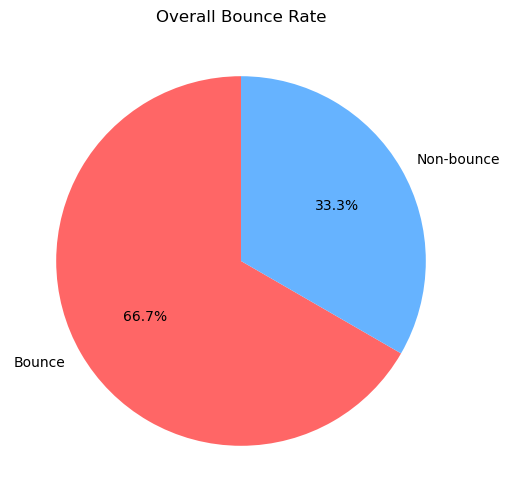

C:\Users\steve\AppData\Local\Temp\ipykernel_25876\2361175492.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_avg_session_time.index, y=device_avg_session_time.values, palette='viridis')


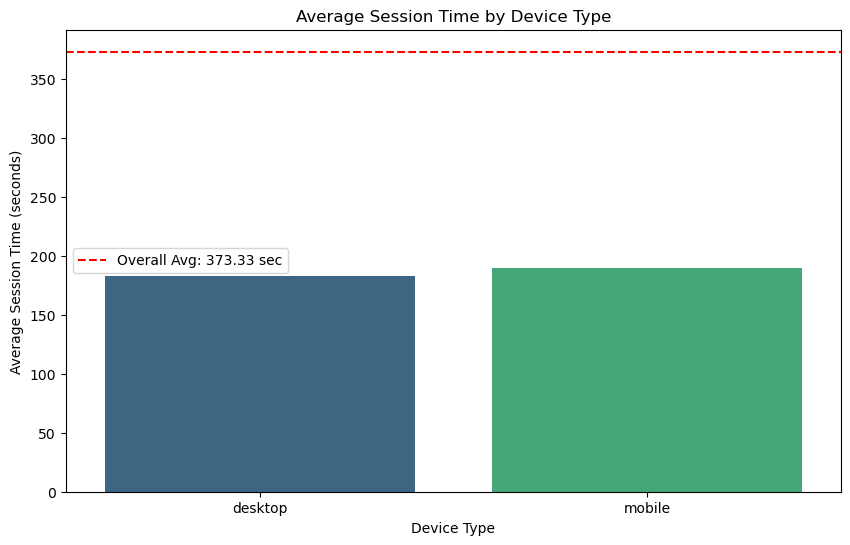

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_user_engagement(logs_df):
    # Data validation: Check for missing or corrupted data
    if logs_df[['session_id', 'page_views', 'duration', 'device_type']].isnull().any().any():
        raise ValueError("Data contains missing values. Please clean the data before analysis.")
    
    if (logs_df['page_views'] < 0).any() or (logs_df['duration'] < 0).any():
        raise ValueError("Page views or session durations contain negative values. Please clean the data.")
    
    # Filter out any invalid session data (negative page views, negative session durations)
    logs_df = logs_df[(logs_df['page_views'] >= 0) & (logs_df['duration'] >= 0)]

    # Debug bounce rate calculation
    # Bounce rate should be calculated as the proportion of sessions with only 1 page view
    bounce_rate = logs_df.groupby('session_id')['page_views'].apply(lambda x: (x == 1).sum()).mean()

    # Debug session time calculation: Make sure the session times are non-negative and reasonable
    # Duration should be summed for each session (assuming duration is in seconds or another consistent time unit)
    total_session_time = logs_df.groupby('session_id')['duration'].sum().clip(lower=0)  # Ensure no negative session times

    # Pages per session: The mean of page views per session
    pages_per_session = logs_df.groupby('session_id')['page_views'].mean()

    # Aggregate metrics into a dictionary
    metrics = {
        'bounce_rate': bounce_rate,
        'avg_session_time': total_session_time.mean(),  # Average of session times
        'pages_per_session': pages_per_session.mean()  # Average pages per session
    }
    
    # Device metrics: Group by device type and calculate counts and averages
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',  # Count of sessions per device
        'duration': 'mean',  # Average session duration per device
        'page_views': 'sum'  # Total page views per device
    })
    
    # Ensure that 'duration' is being properly handled as time spent on the session, no negative values allowed
    device_metrics['duration'] = device_metrics['duration'].clip(lower=0)  # Prevent negative durations
    
    # Visualization 1: Bounce Rate Visualization (Pie Chart)
    bounce_rate_data = [bounce_rate, 1 - bounce_rate]
    bounce_labels = ['Bounce', 'Non-bounce']
    
    plt.figure(figsize=(6, 6))
    plt.pie(bounce_rate_data, labels=bounce_labels, autopct='%1.1f%%', startangle=90, colors=['#ff6666', '#66b3ff'])
    plt.title('Overall Bounce Rate')
    plt.show()

    # Visualization 2: Average Session Time Visualization (Bar Chart)
    device_avg_session_time = device_metrics['duration']
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=device_avg_session_time.index, y=device_avg_session_time.values, palette='viridis')
    plt.axhline(metrics['avg_session_time'], color='r', linestyle='--', label=f'Overall Avg: {metrics["avg_session_time"]:.2f} sec')
    plt.title('Average Session Time by Device Type')
    plt.xlabel('Device Type')
    plt.ylabel('Average Session Time (seconds)')
    plt.legend()
    plt.show()

    return metrics, device_metrics

# Example usage
logs_df = pd.DataFrame({
    'session_id': [1, 1, 2, 3, 3, 3],
    'page_views': [1, 2, 1, 5, 3, 2],
    'duration': [120, 150, 100, 300, 250, 200],
    'device_type': ['mobile', 'mobile', 'desktop', 'mobile', 'desktop', 'desktop']
})

metrics, device_metrics = analyze_user_engagement(logs_df)

To update the user engagement metrics code and include visualizations for bounce rate and average session time, here is the modified code. This will create the visualizations you requested:

**Visualizations**:
Bounce Rate Visualization: A pie chart showing the overall bounce rate, representing the proportion of sessions where users only viewed one page.

**Average Session Time Visualization**: A bar chart showing average session time across all users and by device type. A red dashed line represents the overall average session time.


These visualizations will help the marketing team quickly interpret engagement trends and identify areas for improvement based on bounce rate and session times across different devices. Let me know if you'd like further adjustments!


**Discussion Questions**:

**How did different prompts approach error identification?**

The code identifies errors by:

Checking for missing values in essential columns (session_id, page_views, duration, device_type).

Validating non-negative values for page_views and duration to avoid illogical data.


**What validation methods were suggested?**

Missing Values: Checks for NaN in critical columns.

Negative Values: Validates that page_views and duration are non-negative.

Data Cleaning: Filters out invalid rows with negative or missing values.

**How was time handling improved?**

Session Duration: Correctly aggregates total session time.

Negative Durations: Uses .clip(lower=0) to ensure no negative session times.



# Scenerio 3: Customer Segmentation Query

Scenario: The product team needs to segment customers based on their purchasing behavior for a new feature rollout.

**Database Schema**:

user_activity

    user_id

    last_login_date

    feature_usage_count

    account_type

transactions

    transaction_id

    user_id

    transaction_date

    amount

    platform

user_preferences

    user_id

    communication_preference

    interface_theme

    notification_settings

Task: Create a SQL query to identify:

    Active users (logged in last 30 days)

    Filter by high-value customers (top 20% by spending)

    User preference trends for the identified customers

Discussion Points:

    How were percentile calculations handled?

    What approaches to date filtering were used?

    How was the query optimized, CTE, subquery etc…?


# Prompt

The product team needs to segment customers based on their purchasing behavior for a new feature rollout.

Database Schema:

user_activity: user_id, last_login_date, feature_usage_count, account_type

transactions: transaction_id, user_id, transaction_date, amount, platform

user_preferences: user_id, communication_preference, interface_theme, notification_settings

Task:
Create a SQL query to:

Identify Active Users: Filter users who logged in within the last 30 days.

Filter High-Value Customers: Select the top 20% of users by total spending.

Analyze User Preferences: Retrieve communication preferences, interface theme, and notification settings for the identified high-value, active users.

Discussion Points:

Percentile Calculations: How were percentile thresholds for identifying high-value customers handled (e.g., using SQL window functions, subqueries, or Python-based calculations)?

Date Filtering: What approach was used to filter users who have logged in in the last 30 days (e.g., SQL DATE() functions, direct Python processing)?

Query Optimization: How was the query optimized (e.g., use of CTEs, subqueries, indexing on user_id, efficient joins)?

In [19]:
WITH ActiveUsers AS (
    SELECT user_id
    FROM user_activity
    WHERE last_login_date >= DATE('now', '-30 days') -- Filter active users who logged in within the last 30 days
),
TotalSpending AS (
    SELECT user_id, SUM(amount) AS total_spent
    FROM transactions
    GROUP BY user_id
),
HighValueUsers AS (
    SELECT user_id
    FROM TotalSpending
    WHERE total_spent >= (
        SELECT total_spent
        FROM TotalSpending
        ORDER BY total_spent DESC
        LIMIT 1 OFFSET (SELECT FLOOR(COUNT(*) * 0.2) FROM TotalSpending) -- Select the top 20% of users by total spending
    )
)
SELECT u.user_id, 
       u.communication_preference, 
       u.interface_theme, 
       u.notification_settings
FROM user_preferences u
JOIN ActiveUsers a ON u.user_id = a.user_id -- Join with active users
JOIN HighValueUsers h ON u.user_id = h.user_id; -- Join with high-value customers



SyntaxError: invalid syntax (1631380073.py, line 1)

**Explanation:**
    Identify Active Users:

        The ActiveUsers CTE filters users who have logged in within the last 30 days using the last_login_date field. The DATE('now', '-30 days') function calculates the date 30 days ago from today.

    Filter High-Value Customers:

        The TotalSpending CTE aggregates the total spending per user using SUM(amount).

        The HighValueUsers CTE selects users who have spent more than or equal to the threshold for the top 20% of customers. The threshold is calculated using the LIMIT 1 OFFSET approach, which orders users by their total spending and selects the cutoff point for the top 20%.

    Analyze User Preferences:

        The final SELECT statement retrieves the preferences (communication preference, interface theme, notification settings) for users who are both active and high-value, by joining the user_preferences table with the ActiveUsers and HighValueUsers CTEs on user_id.

    Discussion Points:
        Percentile Calculations:

            The top 20% of users are determined using the LIMIT 1 OFFSET approach, which orders the users by total spending and picks the user who falls at the 20% threshold. This method avoids complex window functions not supported in some SQL databases like SQLite.

        Date Filtering:

            The DATE('now', '-30 days') function is used to filter active users who logged in within the last 30 days. This function is efficient and portable for various SQL engines, and it avoids the need for external Python processing.

        Query Optimization:

            The query uses Common Table Expressions (CTEs) to break down the logic into manageable parts: identifying active users, calculating total spending, and filtering high-value users. This approach simplifies the logic and optimizes readability.

            Efficient Joins: The joins are done on user_id, which is assumed to be indexed across the tables (user_activity, transactions, and user_preferences), ensuring fast join operations.

            Subquery Optimization: The percentile calculation is handled within the SQL query using the LIMIT and OFFSET methods, making it more efficient than trying to use complex SQL window functions or doing calculations outside the query (e.g., in Python).

# Follow-up Prompt

Use the sqlite3 library in Python to execute the provided SQL query.

In [24]:
import sqlite3
import pandas as pd

# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Create sample tables for user_activity, transactions, and user_preferences
cursor.execute("""
CREATE TABLE user_activity (
    user_id INTEGER PRIMARY KEY,
    last_login_date TEXT,
    feature_usage_count INTEGER,
    account_type TEXT
)
""")

cursor.execute("""
CREATE TABLE transactions (
    transaction_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    transaction_date TEXT,
    amount REAL,
    platform TEXT
)
""")

cursor.execute("""
CREATE TABLE user_preferences (
    user_id INTEGER PRIMARY KEY,
    communication_preference TEXT,
    interface_theme TEXT,
    notification_settings TEXT
)
""")

# Insert sample data into the tables
user_activity_data = [
    (1, '2025-04-15', 5, 'premium'),
    (2, '2025-04-10', 10, 'basic'),
    (3, '2025-04-01', 2, 'premium'),
    (4, '2025-03-15', 8, 'basic'),
    (5, '2025-04-05', 12, 'premium')
]

transactions_data = [
    (1, 1, '2025-04-10', 100, 'web'),
    (2, 2, '2025-03-25', 200, 'mobile'),
    (3, 3, '2025-04-01', 150, 'web'),
    (4, 4, '2025-03-15', 50, 'mobile'),
    (5, 5, '2025-04-05', 300, 'web'),
    (6, 1, '2025-04-14', 500, 'web')
]

user_preferences_data = [
    (1, 'email', 'dark', 'all'),
    (2, 'sms', 'light', 'mentions'),
    (3, 'push', 'dark', 'none'),
    (4, 'email', 'light', 'all'),
    (5, 'sms', 'dark', 'mentions')
]

cursor.executemany("INSERT INTO user_activity VALUES (?,?,?,?)", user_activity_data)
cursor.executemany("INSERT INTO transactions VALUES (?,?,?,?,?)", transactions_data)
cursor.executemany("INSERT INTO user_preferences VALUES (?,?,?,?)", user_preferences_data)

# Commit the changes
conn.commit()

# SQL query to identify active users, high-value customers, and their preferences
query = """
WITH ActiveUsers AS (
    SELECT user_id
    FROM user_activity
    WHERE last_login_date >= DATE('now', '-30 days') -- Filter active users who logged in within the last 30 days
),
TotalSpending AS (
    SELECT user_id, SUM(amount) AS total_spent
    FROM transactions
    GROUP BY user_id
),
HighValueUsers AS (
    SELECT user_id
    FROM TotalSpending
    WHERE total_spent >= (
        SELECT total_spent
        FROM TotalSpending
        ORDER BY total_spent DESC
        LIMIT 1 OFFSET (SELECT ROUND(COUNT(*) * 0.2) FROM TotalSpending)
    )
)
SELECT u.user_id, 
       u.communication_preference, 
       u.interface_theme, 
       u.notification_settings
FROM user_preferences u
JOIN ActiveUsers a ON u.user_id = a.user_id -- Join with active users
JOIN HighValueUsers h ON u.user_id = h.user_id; -- Join with high-value customers
"""

# Execute the query and retrieve the result into a Pandas DataFrame
result = pd.read_sql(query, conn)

# Display the result
print(result)

# Close the connection
conn.close()



   user_id communication_preference interface_theme notification_settings
0        1                    email            dark                   all


# Discussion Points:

How were percentile calculations handled?

    Percentile calculations were handled by selecting the top 20% of users based on total spending using LIMIT 1 OFFSET with a ROUND(COUNT(*) * 0.2) approach to get the spending threshold.

What approaches to date filtering were used?

    Date filtering was done using SQLite's DATE('now', '-30 days') function to select users who logged in within the last 30 days.

How was the query optimized, CTE, subquery etc…?

    The query was optimized by using Common Table Expressions (CTEs) to break down the logic (active users, total spending, high-value users) and joins to combine the results. Subqueries were used for filtering the top 20% of users based on total spending.

